<a href="https://colab.research.google.com/github/Rithuchirathalakkaljose/Crossvalidation/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CROSS VALIDATION USING SMOKING.CSV DATASET**



# Background of the project
Cross validation is a statistical methode of evaluating and comparing learning algorithams by dividing data into two segments.One used to learn or train the modeland another used to validate the model.


# About smoking data set.

The smoking data set predicts whether or not a person smoke based on health biological signal. By using different cross validation methods let's try to predict whether person will smoke or not.

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# LOAD DATASET

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [ ]:
df.shape

(55692, 27)

In [ ]:
df.describe

<bound method NDFrame.describe of           ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyesight(r

In [ ]:
print(df.isna().sum())

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


In [ ]:
df.value_counts

<bound method DataFrame.value_counts of           ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyes

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

**DROPING ID**

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


# **EDA**

# **HOW MUCH PERCENTAGE IN THE GENDER DATA SET**



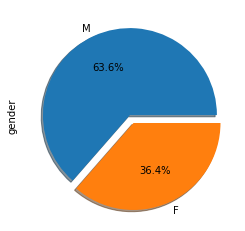

In [ ]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

# **HOW MUCH PERCENTAGE IN THE SMOKING IN THE DATA SET**

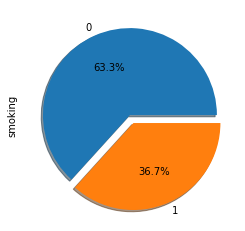

In [ ]:
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

# **BOXPLOT FOR SHOW DESCRIBE AGE**

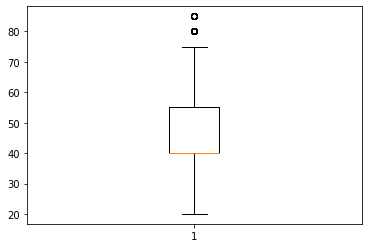

In [ ]:
plt.boxplot(df["age"])
plt.show()

# **BOXPLOT FOR SHOW DESCRIBE HEIGHT**

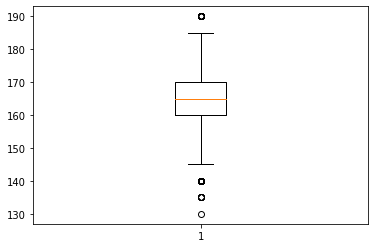

In [ ]:
plt.boxplot(df["height(cm)"])
plt.show()

# **BOXPLOT FOR SHOW DESCRIBE WEIGHT**

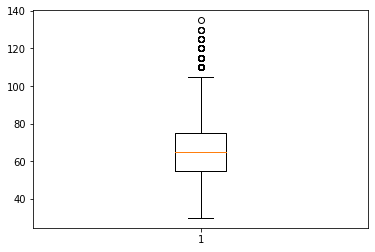

In [ ]:
plt.boxplot(df["weight(kg)"])
plt.show()

# **MAKE GROUPBY TO SHOW AVARAGE AGE OF SMOKING**

In [ ]:
gb=df.groupby("smoking")["age"].mean()
gb

smoking
0    45.677981
1    41.607431
Name: age, dtype: float64

# **GRAPH AVARAGE AGE SMOKING**

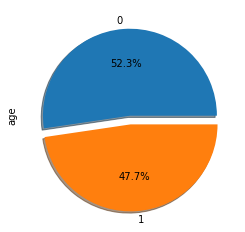

In [ ]:

gb.plot(kind="pie",explode=[0,0.1],autopct='%1.1f%%',shadow=True)

# **GROUP BY SHOW FOR AVARAGE AGE, WEIGHT AND HEIGHT BY GENDER**

In [ ]:
ahw=df.groupby(["gender","smoking"])["age","weight(kg)","height(cm)"].mean().round(0)
ahw

<ipython-input-18-672071c44a95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ahw=df.groupby(["gender","smoking"])["age","weight(kg)","height(cm)"].mean().round(0)


age  weight(kg)  height(cm)
gender smoking                              
F      0        49.0        56.0       156.0
       1        46.0        56.0       157.0
M      0        42.0        71.0       170.0
       1        41.0        72.0       170.0

# **GRAPH SHOWS AVARAGE AGE, WEIGHT AND HEIGHT BY GENDER**

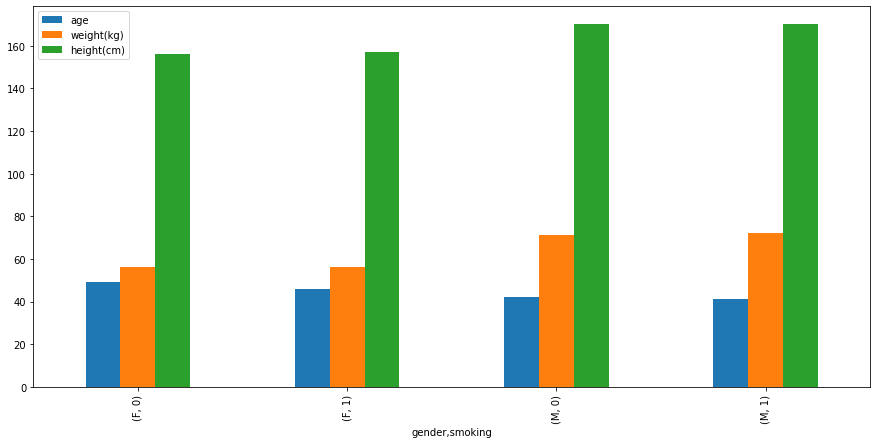

In [ ]:
ahw.plot(kind="bar",figsize=(15,7))

# **CORRELATION GRAPH**

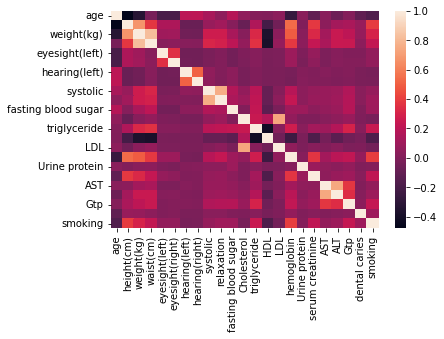

In [ ]:
sns.heatmap(df.corr())

**LABEL ENCODING**==Changing the dataset

In [ ]:
df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender']) 
df['oral']=le.fit_transform(df['oral'])
df['tartar']=le.fit_transform(df['tartar'])
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


**CHECKING IMBALANCED DATASET**

In [ ]:
df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

# ***                        CROSS VALIDATION***


> It is a statistical method.


> Used for evaluating and comparing learning algorithams by dividing data into two segments






In [ ]:
x=df.iloc[:,:-1].values
x


array([[  0.,  40., 155., ...,   0.,   0.,   1.],
       [  0.,  40., 160., ...,   0.,   0.,   1.],
       [  1.,  55., 170., ...,   0.,   0.,   0.],
       ...,
       [  0.,  55., 160., ...,   0.,   0.,   0.],
       [  1.,  60., 165., ...,   0.,   0.,   0.],
       [  1.,  55., 160., ...,   0.,   0.,   1.]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 0, 1])

# CROSS VALIDATION METHODS

# **Hold Out Validation Approch === Train and Test Split**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred



array([1, 1, 0, ..., 0, 1, 0])

[[8673 1858]
 [1904 4273]]
0.7748384007661001


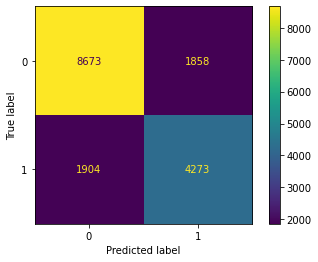

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print(result)
score=accuracy_score(y_test,y_pred)
print(score)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier(criterion='entropy')
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,x,y,cv=kfold_validation)
print(result)
print(np.mean(result))

[0.76552962 0.76535009 0.77374753 0.77356797 0.76584665 0.76979709
 0.76548752 0.77356797 1.         1.        ]
0.815289443711389


# **Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier(criterion='entropy')
result=cross_val_score(model,x,y,cv=skfold)
print(result)
print(np.mean(result))




[0.76452105 0.76721429 0.76081882 0.76719339 0.99964087]
0.8118776847666676


# **CONCLUSION**

1.Hold out Validation Approch =======      77% Accuracy (Decision Tree)

2.K-Fold Cross Validation============      81% Accuracy

3.Stratified K-Fold Cross Validation=      81% Accuracy

It can conclude that cross validation provides more accuracy compare to decision tree.

